In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score, silhouette_samples

from sklearn.preprocessing import scale

from sklearn.cluster import DBSCAN

from sklearn import  datasets

from sklearn.decomposition import PCA

%matplotlib inline

C:\Users\kubag\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# Clustering pt II
## Exercsie 1.

In [2]:
X, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=0.8, random_state=0)

Plotting the dataset generated by make_blobs()

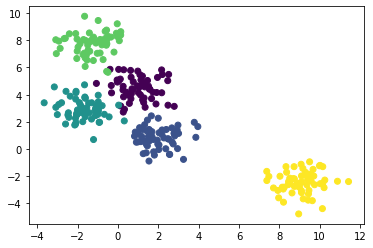

In [3]:
plt.scatter(X[:,0], X[:,1], c=y_true)

In [4]:
kmeans = KMeans(n_clusters=2)

In [5]:
ypred = kmeans.fit_predict(X,y_true)

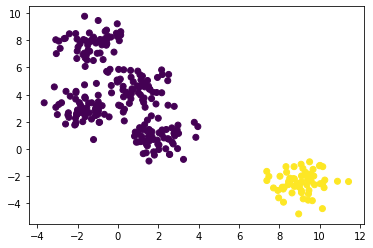

In [6]:
plt.scatter(X[:,0], X[:,1], c=ypred)

Using the dendogram and linkage

In [7]:
X, y_true = make_blobs(n_samples=30, centers=5,
                       cluster_std=0.8, random_state=0)

In [8]:
Z = linkage(X)

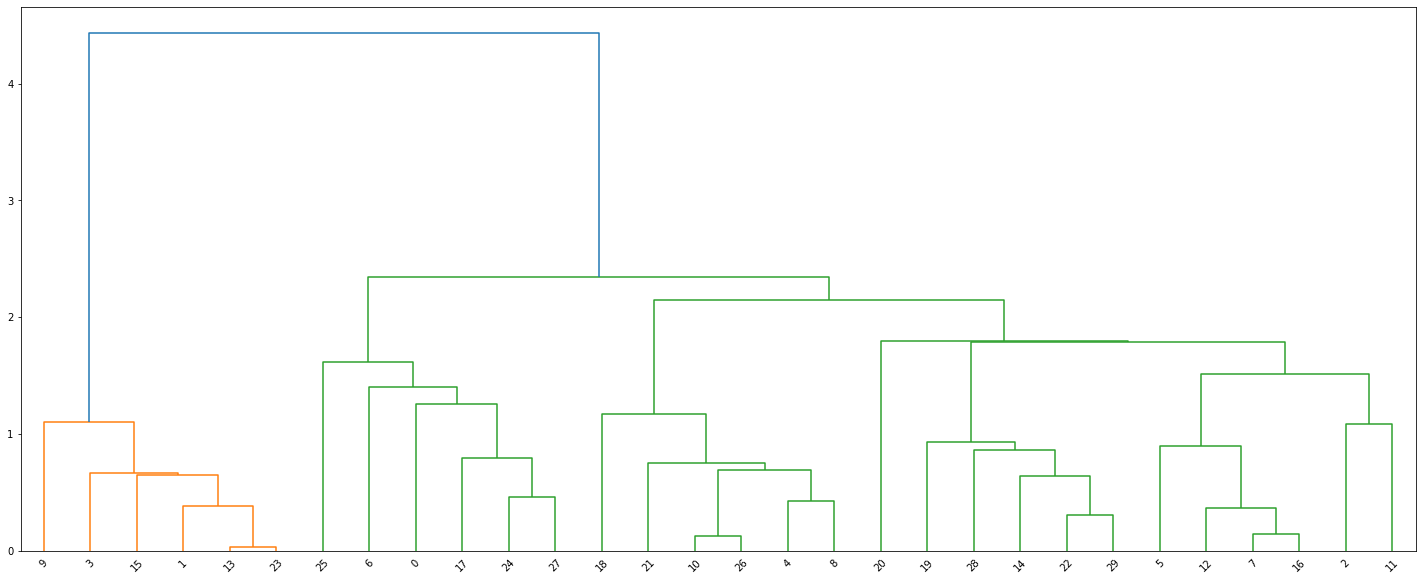

In [9]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

# Clustering pt II
## Exercise 2. Agglomerative clustering

In [10]:
dataset = pd.read_csv('shopping_data.csv', index_col=0)
dataset.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [11]:
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


In [12]:
Z = linkage(X, 'ward')

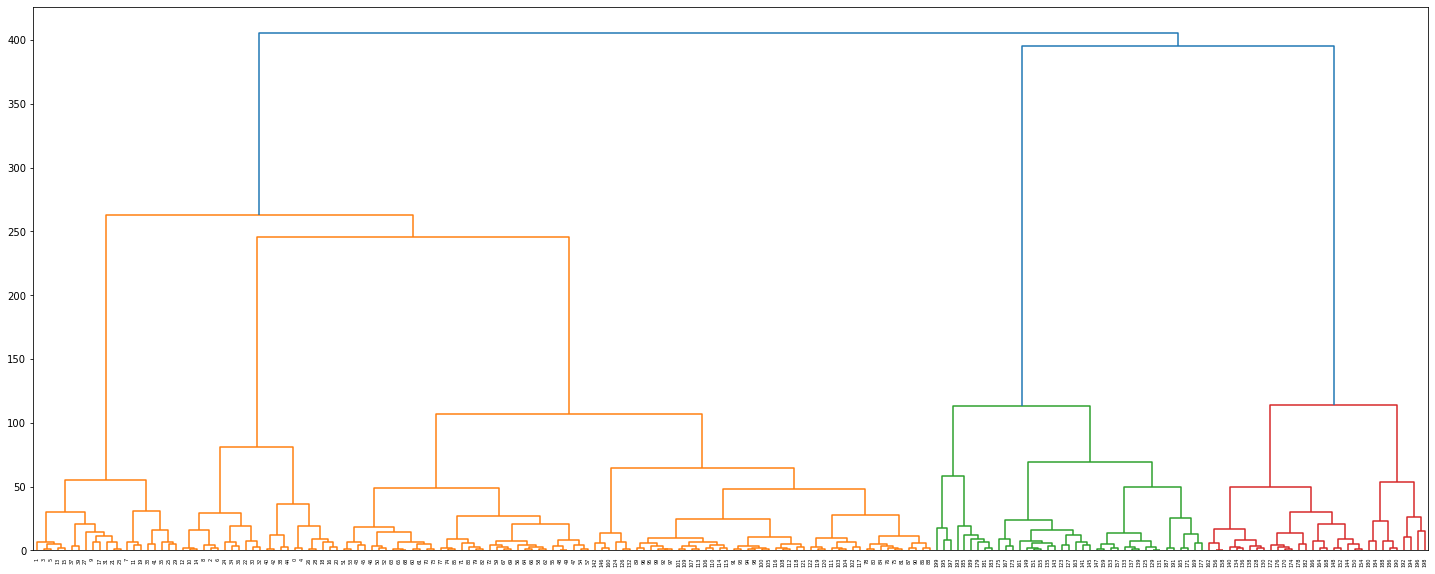

In [13]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

k value for KMeans is 3

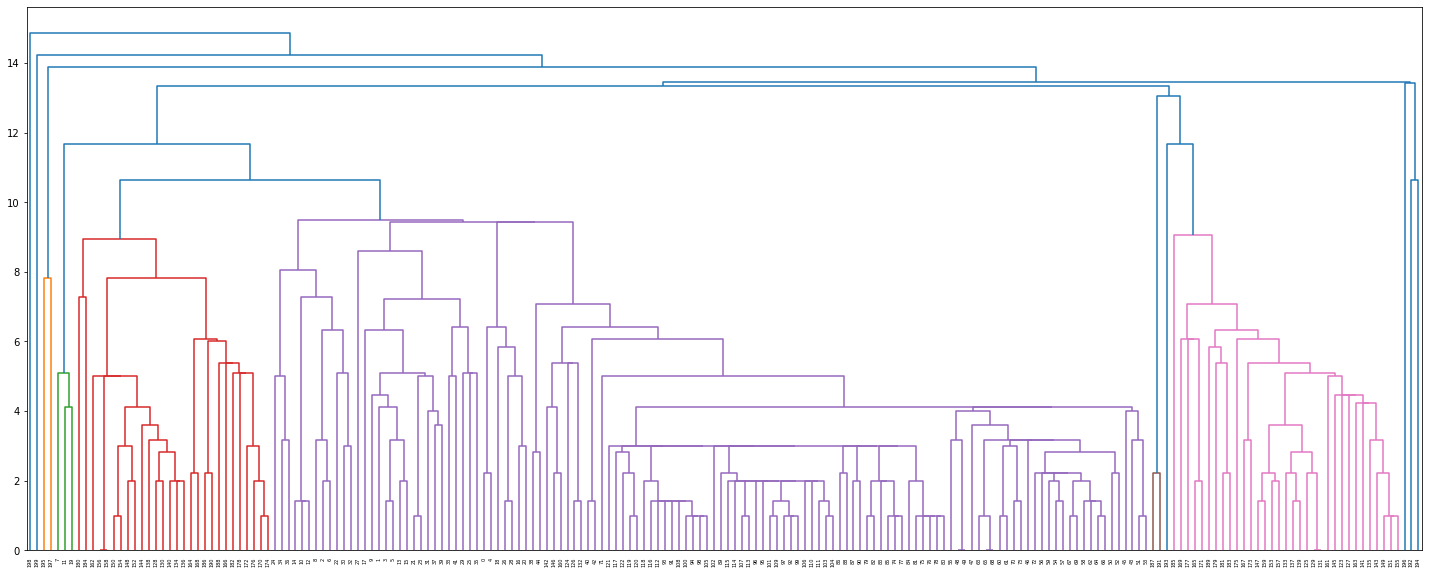

In [14]:
Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

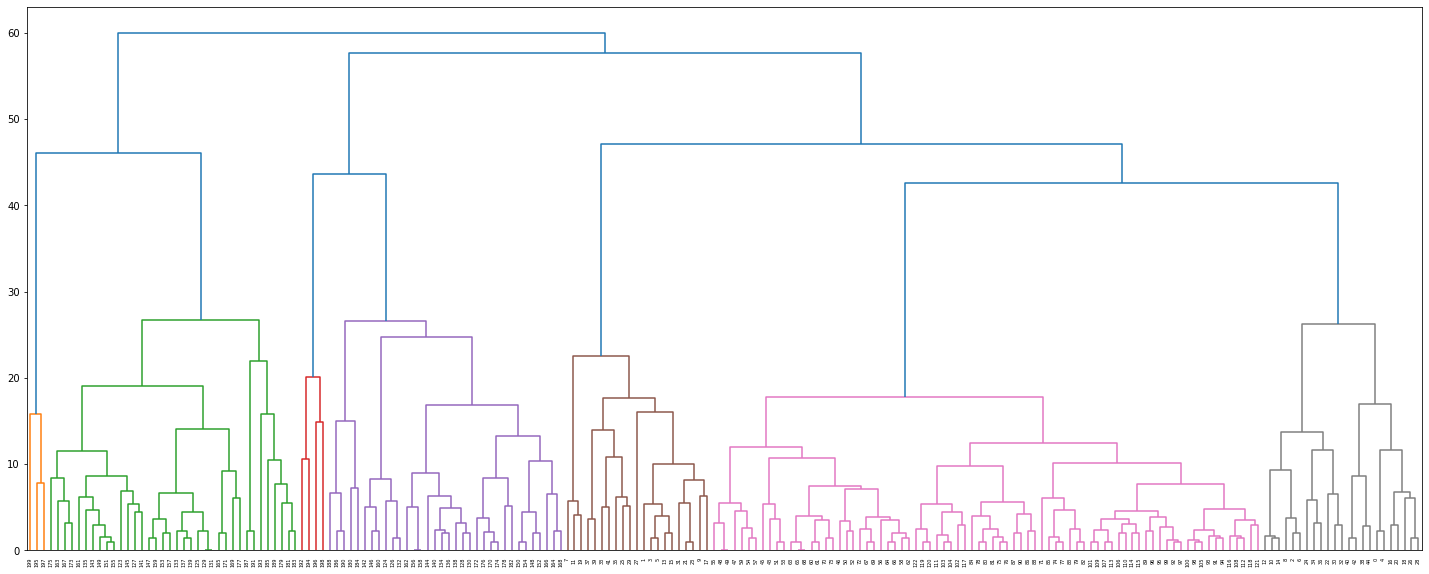

In [15]:
Z = linkage(X, 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

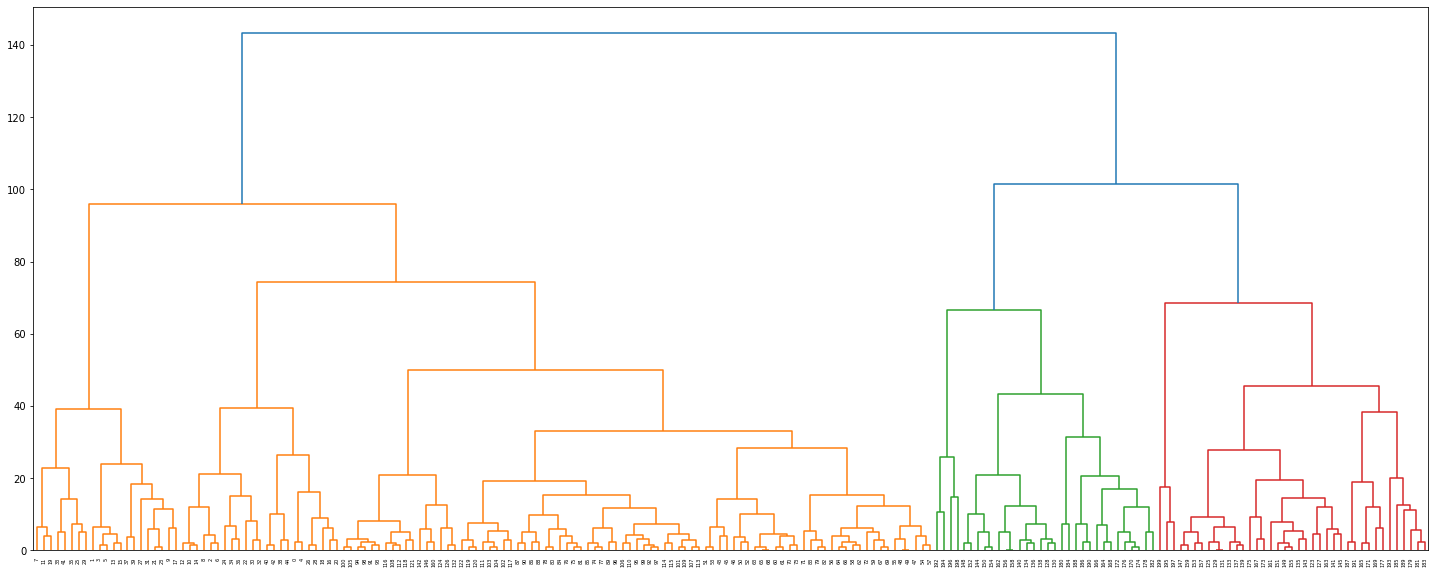

In [16]:
Z = linkage(X, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

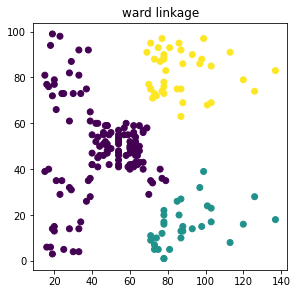

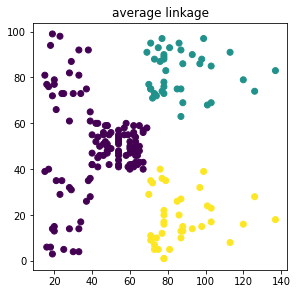

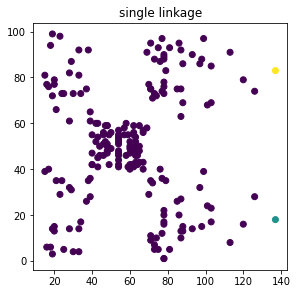

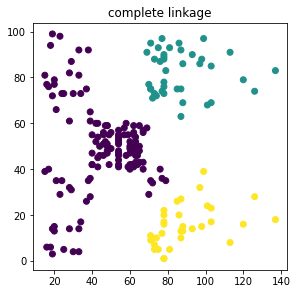

In [17]:
linkages = ['ward', 'average', 'single', 'complete']

for i in range(4):
    clustering = AgglomerativeClustering(n_clusters = 3, linkage = linkages[i]).fit(X)
    fig = plt.figure(figsize=(10, 10))
    plt.subplot(2,2, i+1)
    plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=clustering.labels_)
    plt.title(linkages[i] + ' linkage')

# Clustering pt II
## Exercise 3. Selecting the number of clusters with silhouette analysis on KMeans clustering

In [18]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

Determining the cluster range

For n_clusters = 2 The average silhouette_score is : 0.7049787496083261
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5745566973301872
For n_clusters = 6 The average silhouette_score is : 0.4390271118313242
For n_clusters = 7 The average silhouette_score is : 0.3728615111052894
For n_clusters = 8 The average silhouette_score is : 0.32799178719839805
For n_clusters = 9 The average silhouette_score is : 0.3322227124919708
For n_clusters = 10 The average silhouette_score is : 0.33861725270668125


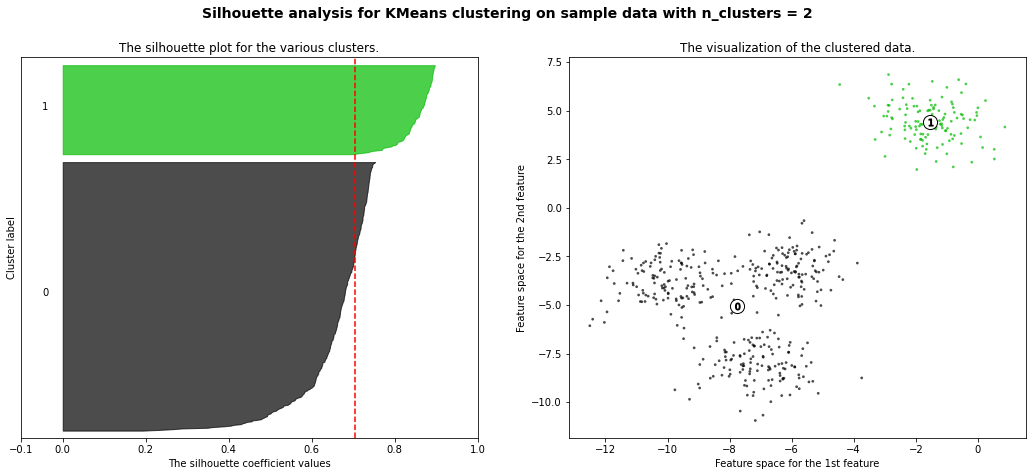

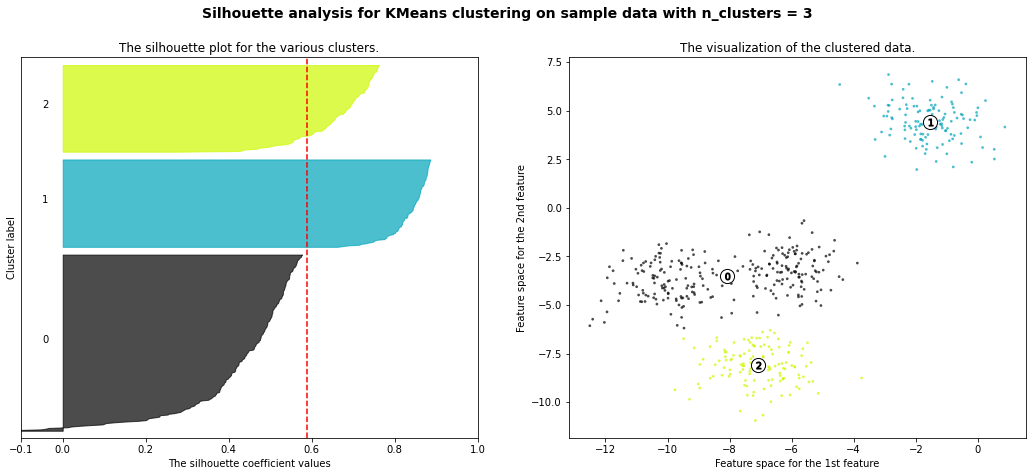

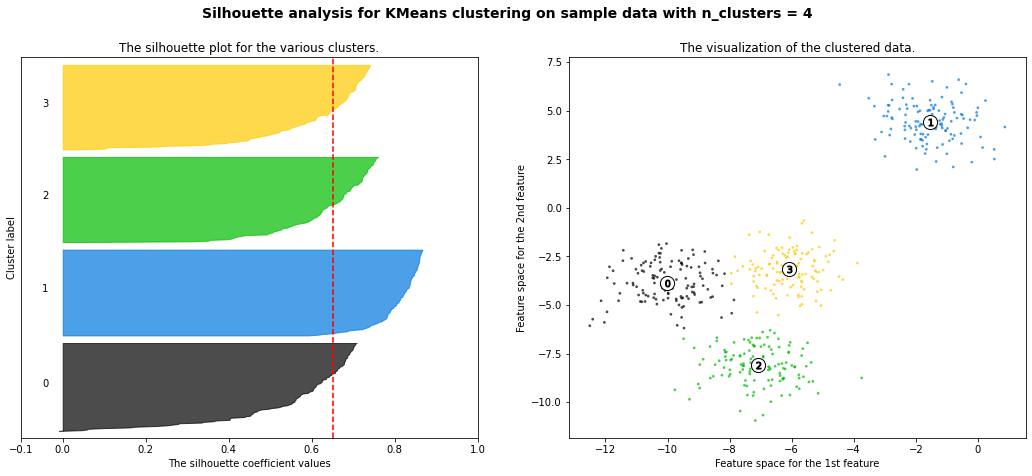

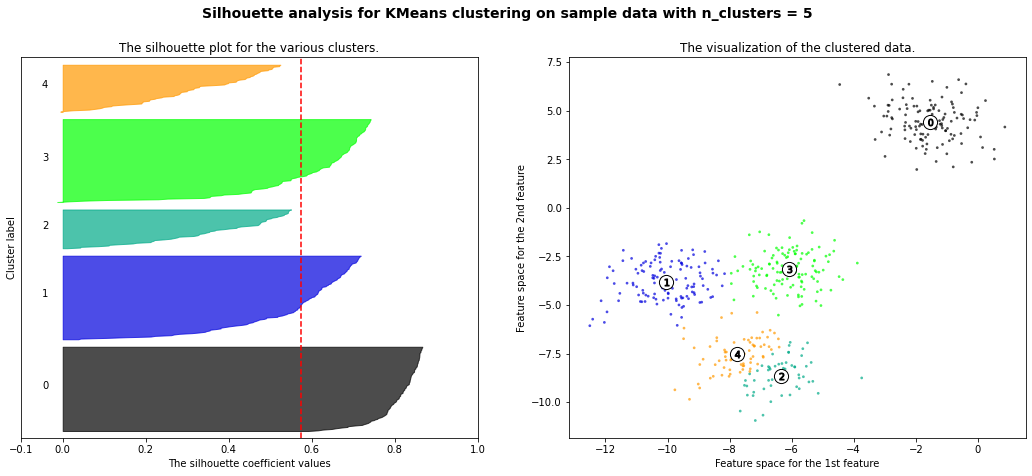

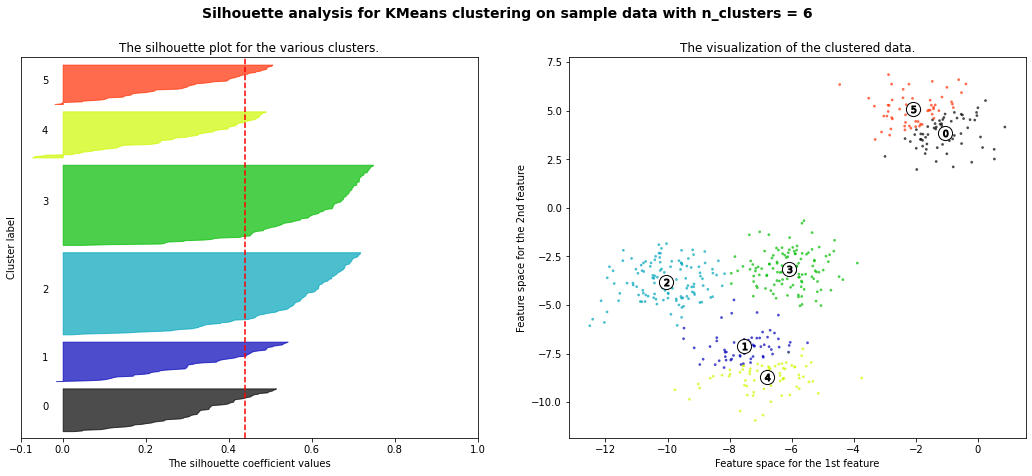

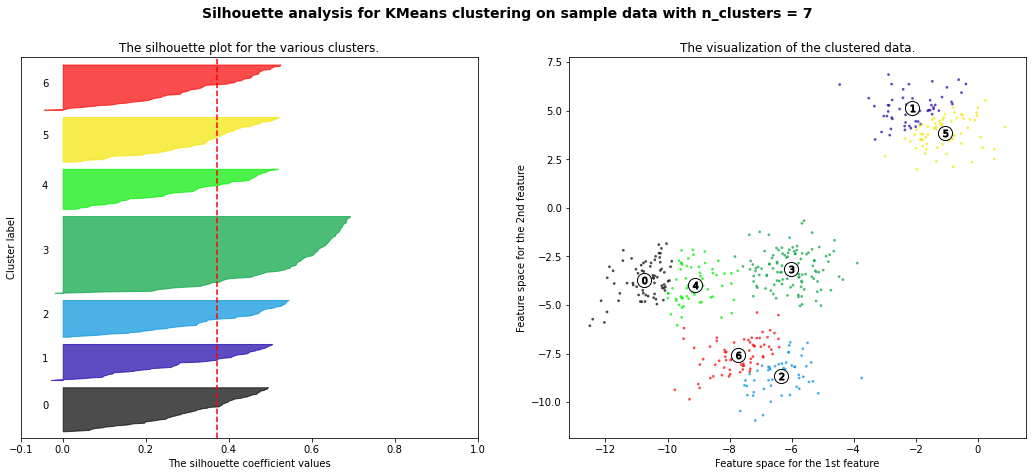

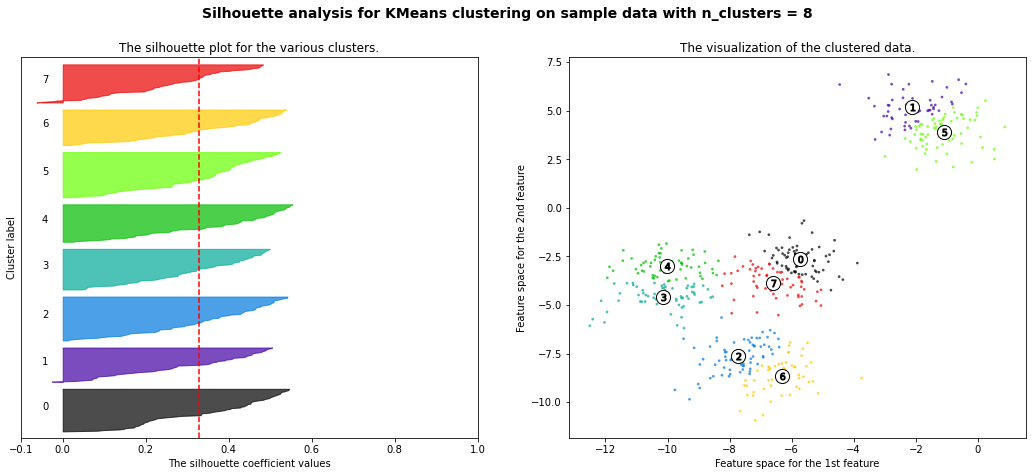

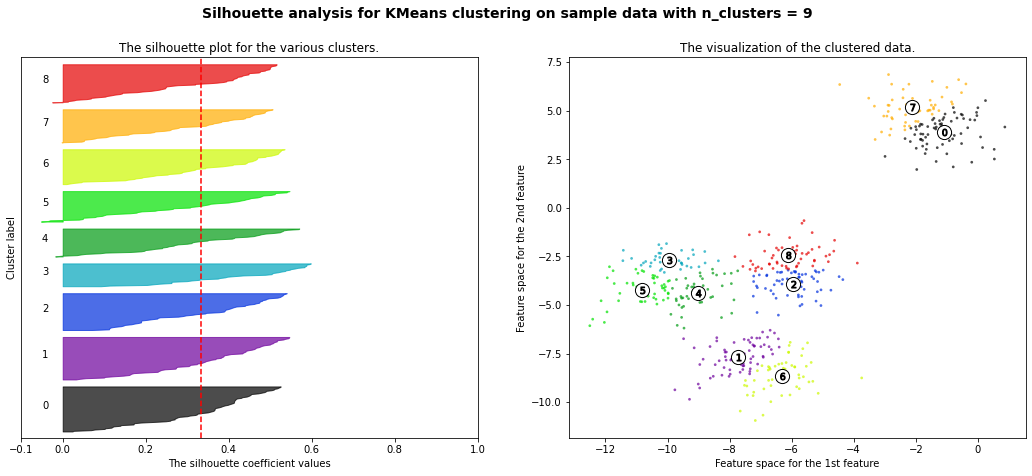

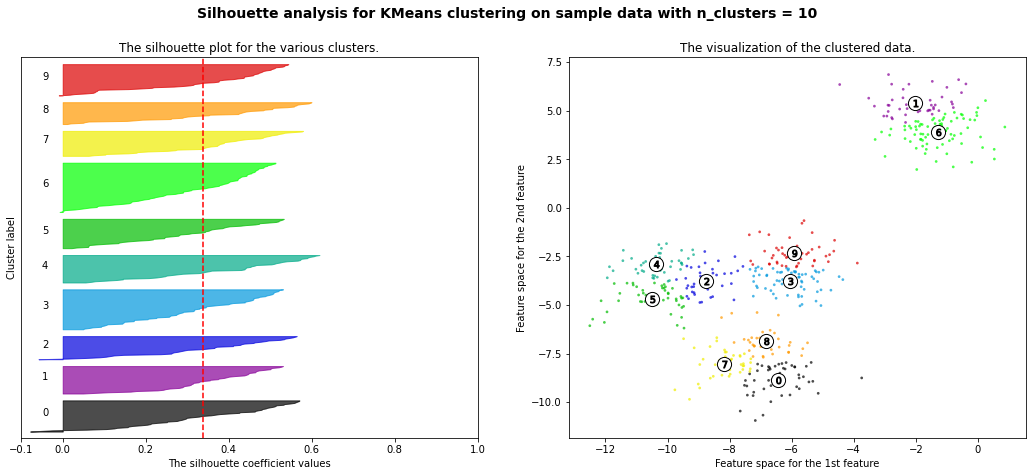

In [19]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Clustering pt II
## Exercise 4. DBSCAN algorithm

In [20]:
# ============
# Generate datasets.
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
 
# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
 
# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

In [22]:
clustering = DBSCAN(min_samples=10).fit(X)

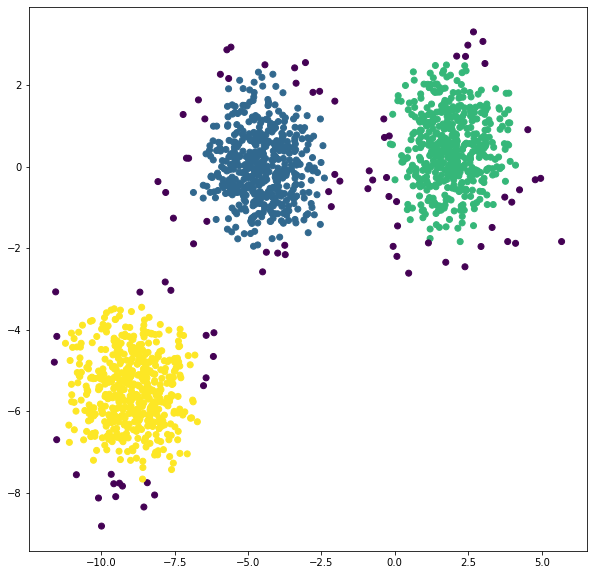

In [23]:
plt.figure(figsize=[10, 10])
plt.scatter(X[:,0], X[:,1], c=clustering.labels_)

In [24]:
clustering = AgglomerativeClustering(n_clusters=3).fit(X)

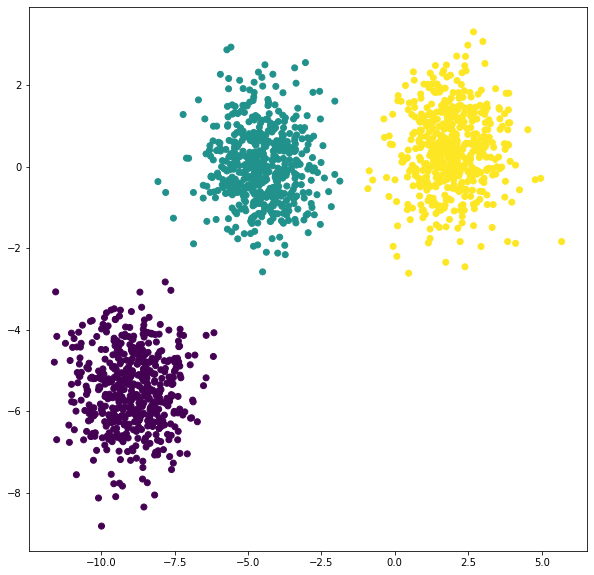

In [25]:
plt.figure(figsize=[10, 10])
plt.scatter(X[:,0], X[:,1], c=clustering.labels_)

In [26]:
k_means = KMeans(init='random', n_clusters=3)
k_means.fit(X)
labels = k_means.predict(X)

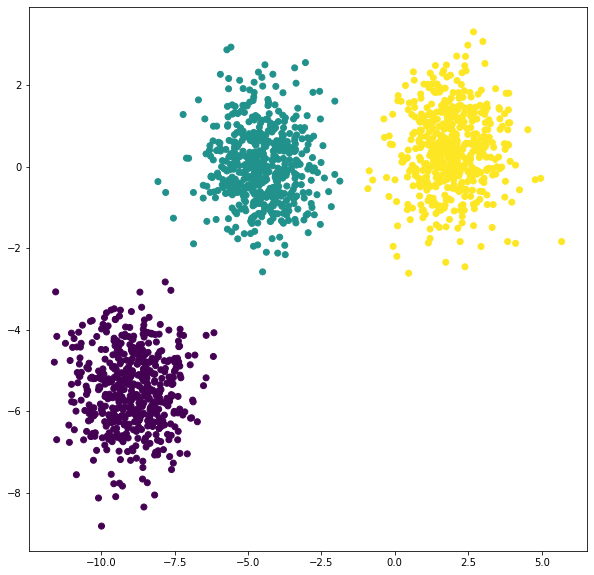

In [27]:
plt.figure(figsize=[10, 10])
plt.scatter(X[:,0], X[:,1], c=labels)

# PCA
## Exercise 1: 

In [30]:
df = pd.read_csv('usarrests.csv', index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [32]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [33]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

Data scaling is needed due to highly different means and variance

In [34]:
X=pd.DataFrame(scale(df), index=df.index, columns=df.columns)

In [37]:
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3','V4'])

In [38]:
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [40]:
pca=PCA()
df_plot=pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


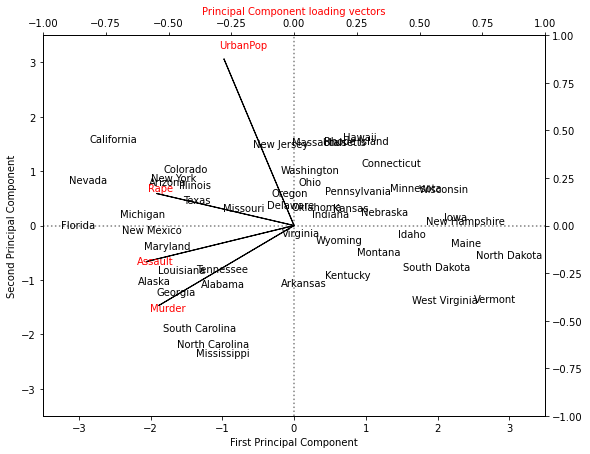

In [42]:
fig , ax1=plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (-df_plot.PC1.loc[i],-df_plot.PC2.loc[i]), ha='center')
    
# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

# Plot Principal Component loading vectors, using a second y-axis.
ax2=ax1.twinx().twiny()

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='red')

# Plot labels for vectors. Variable ’a’ is a small offset parameter to separate arrow tip and text.
a=1.07
for i in pca_loadings[['V1','V2']].index:
    ax2.annotate(i, (-pca_loadings.V1.loc[i]*a,-pca_loadings.V2.loc[i]*a), color='red')
    
# Plot vectors
ax2.arrow(0,0,-pca_loadings.V1[0],-pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1],-pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2],-pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3],-pca_loadings.V2[3])

In [43]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [44]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

([<matplotlib.axis.XTick at 0x2381c7d3550>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

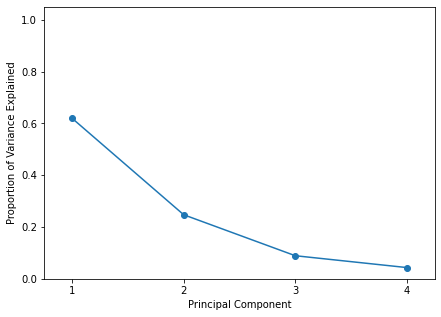

In [46]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], pca.explained_variance_ratio_,'-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])

([<matplotlib.axis.XTick at 0x2381c68dda0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

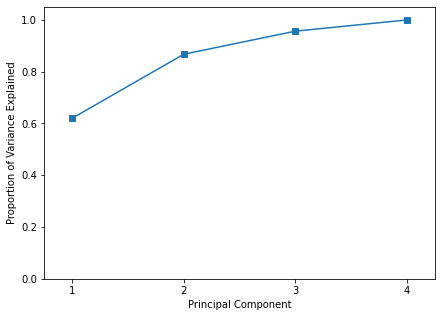

In [47]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_),'-s')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])

# PCA
## Exercsie 1:

In [2]:
df2=pd.read_csv('NCI60.csv').drop('Unnamed: 0', axis=1)
df2.columns=np.arange(df2.columns.size)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6830 entries, 0 to 6829
dtypes: float64(6830)
memory usage: 3.3 MB


In [3]:
# Read in the labels to check our work later
y=pd.read_csv('NCI60_y.csv', usecols=[1], skiprows=1, names=['type'])

In [4]:
# Scale the data
X=pd.DataFrame(scale(df2))
X.shape

(64, 6830)

In [5]:
# Fit the PCA model and transform X to get the principal components
pca2=PCA()
df2_plot=pd.DataFrame(pca2.fit_transform(X))

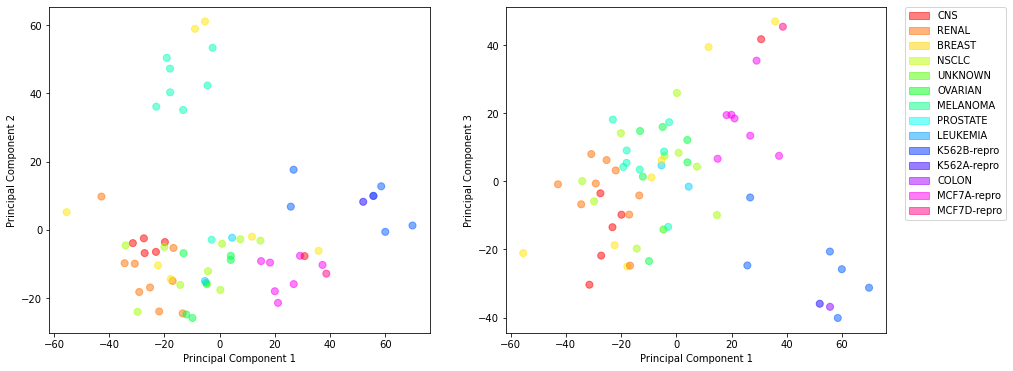

In [6]:
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(15,6))

color_idx=pd.factorize(y.type)[0]
cmap=mpl.cm.hsv

# Left plot
ax1.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,1], c=color_idx, cmap=cmap, alpha=0.5,s=50)
ax1.set_ylabel('Principal Component 2')

# Right plot
ax2.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5,s=50)
ax2.set_ylabel('Principal Component 3')

# Custom legend for the classes (y) since we do not create scatter plots per class (which could have their own labels).
handles=[]
labels=pd.factorize(y.type.unique())
norm=mpl.colors.Normalize(vmin=0.0, vmax=14.0)

for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))

ax2.legend(handles=handles, bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

# xlabel for both plots
for ax in fig.axes:
    ax.set_xlabel('Principal Component 1')

In [7]:
pd.DataFrame([df2_plot.iloc[:,:5].std(axis=0, ddof=0).values,
              pca2.explained_variance_ratio_[:5],
              np.cumsum(pca2.explained_variance_ratio_[:5])],
              index=['Standard Deviation','Proportion of Variance','Cumulative Proportion'],
              columns=['PC1','PC2','PC3','PC4','PC5'])

,PC1,PC2,PC3,PC4,PC5
Standard Deviation,27.853469,21.481355,19.820465,17.032556,15.971807
Proportion of Variance,0.113589,0.067562,0.057518,0.042476,0.037350
Cumulative Proportion,0.113589,0.181151,0.238670,0.281145,0.318495


Text(0, 0.5, 'Variances')

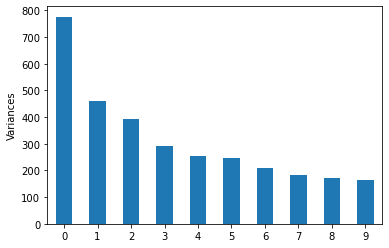

In [8]:
df2_plot.iloc[:,:10].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances')

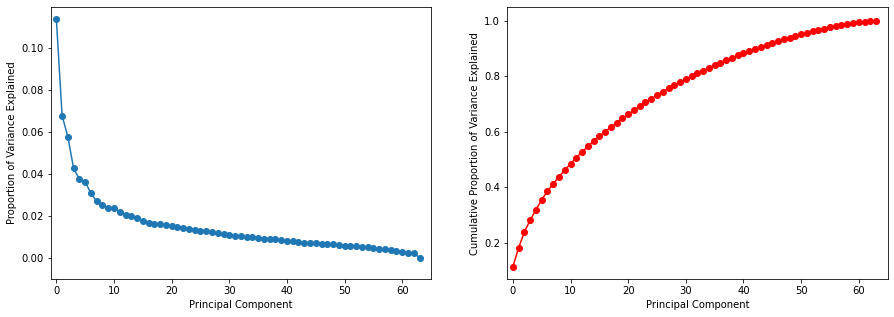

In [9]:
fig , (ax1,ax2)=plt.subplots(1,2, figsize=(15,5))
# Left plot
ax1.plot(pca2.explained_variance_ratio_,'-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)
# Right plot

ax2.plot(np.cumsum(pca2.explained_variance_ratio_),'-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)

for ax in fig.axes:
    ax.set_xlabel('Principal Component')
    ax.set_xlim(-1,65)

# PCA
## Exercise 2:

In [45]:
from sklearn.preprocessing import StandardScaler
# lodaing sklearn dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [19]:
data = load_iris()

In [35]:
print(data['target_names'])

['setosa' 'versicolor' 'virginica']


In [36]:
df = pd.DataFrame(data.data, columns=data['feature_names'])

In [37]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [38]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [40]:
# Searching null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

No null values found.

Proceeding with scaling

In [41]:
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)

In [42]:
df_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [43]:
df_scaled.var()

sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64

### Exercise 1a
Performing train-test split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, data.target, test_size=.25, random_state=700)

### Exercise 2
Calculating covariance matrix

In [47]:
cov_mrx = np.cov(X_train)

### Exercise 3
Calculating eigenvalues and corresponding eigenvectors

In [48]:
values, vectors = np.linalg.eig(cov_mrx)

In [49]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))

### Exercise 4
Sorting eigenvalues in descending order

In [50]:
zipped_lists = zip(values, vectors)

sorted_pairs = sorted(zipped_lists, reverse=True)


tuples = zip(*sorted_pairs)
values, vectors = [ list(tuple) for tuple in  tuples]

### Exercise 5
Using Principal component Analysis

Text(0, 0.5, 'Cumalitive explained variance')

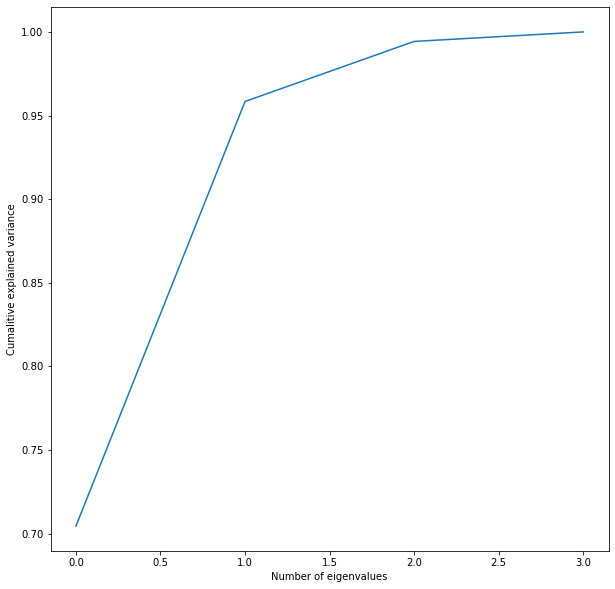

In [52]:
pca = PCA().fit(X_train)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of eigenvalues')
plt.ylabel('Cumalitive explained variance')

In [55]:
values[:2]

[(74.99050203289481+0j), (6.836962997987664+0j)]

In [56]:
pca =  PCA(svd_solver='full', n_components=0.95)
principal_components = pca.fit_transform(X_train)
principal_df = pd.DataFrame(data=principal_components)
principal_df.head()

,0,1
0,1.128025,1.715175
1,-2.410648,0.383893
2,-0.236047,2.679001
3,1.885802,-0.854251
4,-2.591130,0.005312


In [57]:
vectors[:2]

[array([ 0.14044055+0.00000000e+00j, -0.01492921+0.00000000e+00j,
        -0.09279789+0.00000000e+00j,  0.02256257-9.38153538e-02j,
         0.02256257+9.38153538e-02j, -0.12644136+0.00000000e+00j,
        -0.01408378+7.80952252e-03j, -0.01408378-7.80952252e-03j,
         0.05878293+2.36821280e-01j,  0.05878293-2.36821280e-01j,
         0.07084418+2.63815765e-02j,  0.07084418-2.63815765e-02j,
         0.05666494+4.52171488e-03j,  0.05666494-4.52171488e-03j,
        -0.44968667+0.00000000e+00j,  0.00536722-5.71123298e-03j,
         0.00536722+5.71123298e-03j,  0.0214052 +0.00000000e+00j,
         0.1925962 -6.08763014e-02j,  0.1925962 +6.08763014e-02j,
        -0.02803326+4.33869025e-04j, -0.02803326-4.33869025e-04j,
         0.04059977+4.86107370e-02j,  0.04059977-4.86107370e-02j,
         0.02812859-3.99081683e-02j,  0.02812859+3.99081683e-02j,
         0.09253054+1.26008332e-02j,  0.09253054-1.26008332e-02j,
         0.04087751+0.00000000e+00j, -0.02158083+5.34411594e-02j,
        -0